<a href="https://colab.research.google.com/github/suzannedantis/ML_lab_Suzanne/blob/main/Linear_regression_with_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

In [10]:
df=pd.read_csv("/content/sample_data/Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [13]:
x=df.drop(columns="Salary")
y=df["Salary"]

In [19]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
lr=LinearRegression()
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
x_train_scaled=min_max.fit_transform(x_train)
x_test_scaled=min_max.transform(x_test)
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [21]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train_scaled, y_train)
y_pred_ridge = ridge.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [22]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_scaled, y_train)
y_pred_lasso = lasso.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [23]:
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Coefficients:", lasso.coef_)

Ridge MSE: 645722744904.7083
Lasso MSE: 53385742630.57015
Lasso Coefficients: [-24641.75519645 113147.01032721]


In [28]:
import matplotlib.pyplot as plt

In [26]:
y_pred_lr = lr.predict(x_test_scaled)

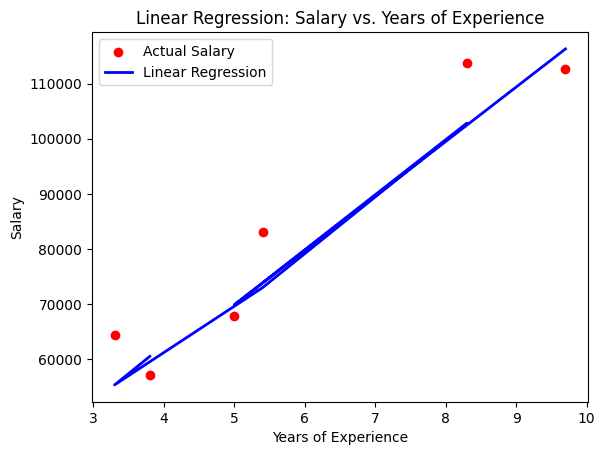

In [27]:
plt.scatter(x_test['YearsExperience'], y_test, color='red', label='Actual Salary')
plt.plot(x_test['YearsExperience'], y_pred_lr, color='blue', linewidth=2, label='Linear Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Salary vs. Years of Experience')
plt.legend()
plt.show()

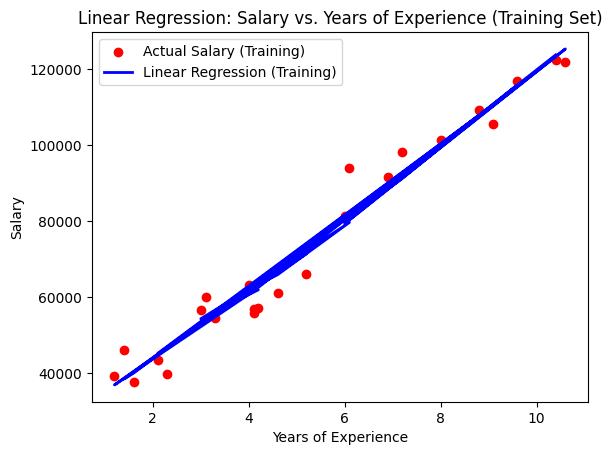

In [30]:
y_pred_lr_train = lr.predict(x_train_scaled)

plt.scatter(x_train['YearsExperience'], y_train, color='red', label='Actual Salary (Training)')
plt.plot(x_train['YearsExperience'], y_pred_lr_train, color='blue', linewidth=2, label='Linear Regression (Training)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Salary vs. Years of Experience (Training Set)')
plt.legend()
plt.show()